In [1]:
import torch
import torchvision
from torch.utils import data
from torchvision import transforms

In [4]:
from d2l import torch as d2l

In [5]:
d2l.use_svg_display()

- 读取数据集

In [6]:
trans = transforms.ToTensor()
mnist_train = torchvision.datasets.FashionMNIST(
    root="../data", train=True, transform=trans, download=True)
mnist_test = torchvision.datasets.FashionMNIST(
    root="../data", train=False, transform=trans, download=True)

100.0%


Extracting ../data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



100.0%


Extracting ../data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ../data/FashionMNIST/raw



100.0%

Extracting ../data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/FashionMNIST/raw



In [7]:
len(mnist_train), len(mnist_test) # h * w * 1 元组 一个数据一个标签

(60000, 10000)

In [22]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "edgecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)


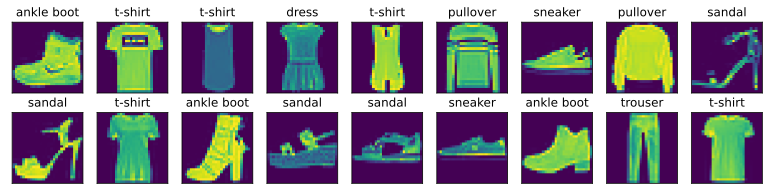

In [23]:
d2l.show_images(X.reshape(18, 28, 28), 2, 9, titles=d2l.get_fashion_mnist_labels(y)) # 还原图像 titles为标签列表

array([<AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'pullover'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'ankle boot'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'t-shirt'}>], dtype=object)

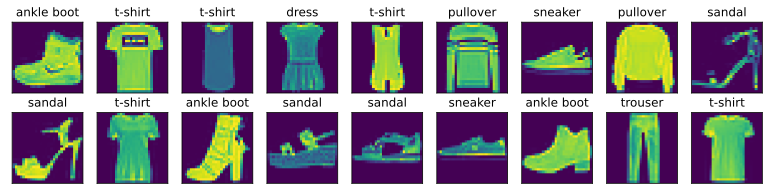

In [25]:
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
X, y = next(iter(data.DataLoader(mnist_train, batch_size=18)))
d2l.show_images(X.reshape(18, 28, 28), 2, 9, titles=d2l.get_fashion_mnist_labels(y)) # 还原图像 titles为标签列表

In [43]:
it = iter(data.DataLoader(mnist_train, batch_size=18))

array([<AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'shirt'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'sneaker'}>,
       <AxesSubplot:title={'center':'dress'}>,
       <AxesSubplot:title={'center':'t-shirt'}>,
       <AxesSubplot:title={'center':'sandal'}>,
       <AxesSubplot:title={'center':'bag'}>,
       <AxesSubplot:title={'center':'coat'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'trouser'}>,
       <AxesSubplot:title={'center':'pullover'}>], dtype=object)

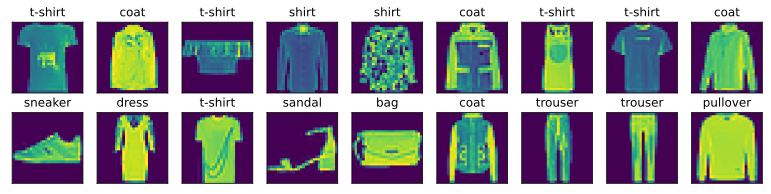

In [56]:
X, y = next(it)
d2l.show_images(X.reshape(18, 28, 28), 2, 9, titles=d2l.get_fashion_mnist_labels(y)) # 还原图像 titles为标签列表

In [65]:
timer = d2l.Timer()
train_iter = (data.DataLoader(mnist_train, batch_size=256, shuffle=True)) # 笑死人多线程速度还慢一些
timer.stop()

0.000179290771484375

In [67]:
timer.start()
for X, y in train_iter:
    continue
timer.stop()

8.182859897613525

In [69]:
timer.start()
X, y = next(iter(train_iter))
timer.stop()

0.04958701133728027

In [78]:
timer.start()
train_iter, test_iter = d2l.load_data_fashion_mnist(32, resize=64)
timer.stop()

0.09202933311462402

In [71]:
X, y = next(iter(train_iter))
print(X.shape, X.dtype, y.shape, y.dtype)

/home/zeng/anaconda3/envs/torch/lib/python3.11/site-packages/torch/utils/data/dataloader.py:560: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 1, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


torch.Size([32, 1, 64, 64]) torch.float32 torch.Size([32]) torch.int64


In [79]:
%ls

3.6softmax实现.ipynb  图像数据集.ipynb  线性回归的简洁实现.ipynb
图像数据分类.ipynb    线性代数.ipynb    读取数据集.ipynb
